In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [7]:
os.getcwd()

'/Users/ls2236/Projects/bee_6880_term_project'

In [8]:
df_gen = pd.read_csv("AMPL/simulations/_general_model/simulations_output/original_demand_by_generator.csv")
df_gen.value = np.round(df_gen.value,2)
df_gen = df_gen.drop(columns="Unnamed: 0")
#df_gen.groupby(['variable','zone']).agg({'value': 'max'}).pivot_table(index='variable',columns='zone',values='value')

In [9]:
date_element = pd.read_csv("data/load_weather_energy_hourly_2018.csv")
date_element.time = pd.to_datetime(date_element.time)
date_element.time[0] 

df_gen["time_in_time"] = date_element.time[0]  +  pd.to_timedelta(df_gen.time-1, unit='h')
df_gen['day'] = df_gen.time_in_time.dt.dayofyear

In [10]:
df_gen.head(5)

,time,generator,zone,variable,value,time_in_time,day
0,1,WIND,A,existing_capacity,286.40,2018-01-01 05:00:00+00:00,1
1,1,WIND,A,new_capacity,1910.63,2018-01-01 05:00:00+00:00,1
2,1,WIND,A,retired_capacity,0.00,2018-01-01 05:00:00+00:00,1
3,1,SOLAR,A,existing_capacity,0.00,2018-01-01 05:00:00+00:00,1
4,1,SOLAR,A,new_capacity,332.33,2018-01-01 05:00:00+00:00,1


In [11]:
df_gen['variable'].unique()

array(['existing_capacity', 'new_capacity', 'retired_capacity',
       'Production', 'Curtailment', 'Charge', 'demand', 'power_flow_in',
       'power_flow_out', 'Load_shed', 'imports'], dtype=object)

**Existing capacity**

In [12]:
df_gen[df_gen.variable == "existing_capacity"].groupby(['generator','zone']).agg({'value': 'sum'}).pivot_table(index='generator',columns='zone',values='value')

zone,A,B,C,D,E,F,G,H,I,J,K
generator,,,,,,,,,,,
FOUR,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GAS,511.5,130.9,3193.10,387.4,214.6,3554.8,4899.1,0.0,0.0,9423.4,5341.1
HYDRO,2460.0,64.0,109.00,915.0,376.0,269.6,75.8,0.0,0.0,0.0,0.0
NUCLEAR,0.0,581.8,2772.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOLAR,0.0,0.0,40.00,0.0,0.0,0.0,160.0,0.0,0.0,0.0,54.4
WIND,286.4,0.0,751.14,678.4,737.3,0.0,0.0,0.0,0.0,0.0,0.0


**New capacity**

In [13]:
df_gen[df_gen.variable == "new_capacity"].groupby(['generator','zone']).agg({'value': 'sum'}).pivot_table(index='generator',columns='zone',values='value')

zone,A,B,C,D,E,F,G,H,I,J,K
generator,,,,,,,,,,,
FOUR,2479.00,10.00,2538.0,2562.00,892.00,4727.00,150.00,140.0,140.0,4263.00,1924.00
GAS,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
HYDRO,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
NUCLEAR,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
SOLAR,332.33,1441.75,0.0,4693.54,9282.89,15139.55,2980.92,0.0,0.0,9585.44,5972.45
WIND,1910.63,679.78,0.0,2394.14,11333.41,0.00,0.00,0.0,0.0,10963.80,5602.92


**Retired capacity**

In [14]:
df_gen[df_gen.variable == "retired_capacity"].groupby(['generator','zone']).agg({'value': 'sum'}).pivot_table(index='generator',columns='zone',values='value')

zone,A,B,C,D,E,F,G,H,I,J,K
generator,,,,,,,,,,,
GAS,511.5,130.9,3193.1,387.4,214.6,3554.8,4899.1,0.0,0.0,8390.6,4214.15
HYDRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
NUCLEAR,0.0,581.8,2772.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
SOLAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
WIND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [15]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [16]:
print(sns.color_palette("Paired").as_hex())

['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928']


In [17]:
palette_dict = {
    'GAS': '#e31a1c', 
    'HYDRO': '#b2df8a',
    'NUCLEAR': '#33a02c',
    'SOLAR': '#ff7f00',
    'WIND': '#1f78b4',
    'FOUR': '#fb9a99'
    }


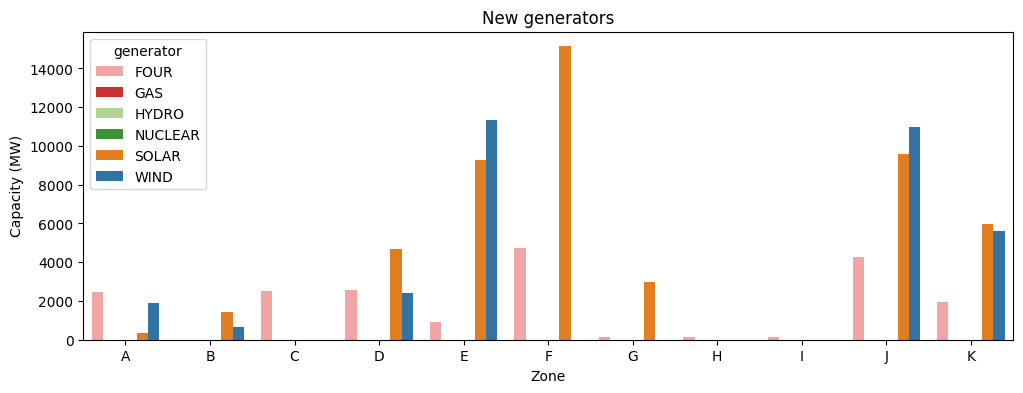

In [18]:
#New generators
df_plot = df_gen[df_gen.variable=='new_capacity'].groupby(["zone","generator"])['value'].sum()
df_plot = df_plot.reset_index()

plt.figure(figsize=(12,4))
p1 = sns.barplot(data=df_plot, x='zone', y='value', hue='generator',palette=palette_dict)
plt.xlabel('Zone')
plt.ylabel('Capacity (MW)')
plt.title('New generators')
plt.show()

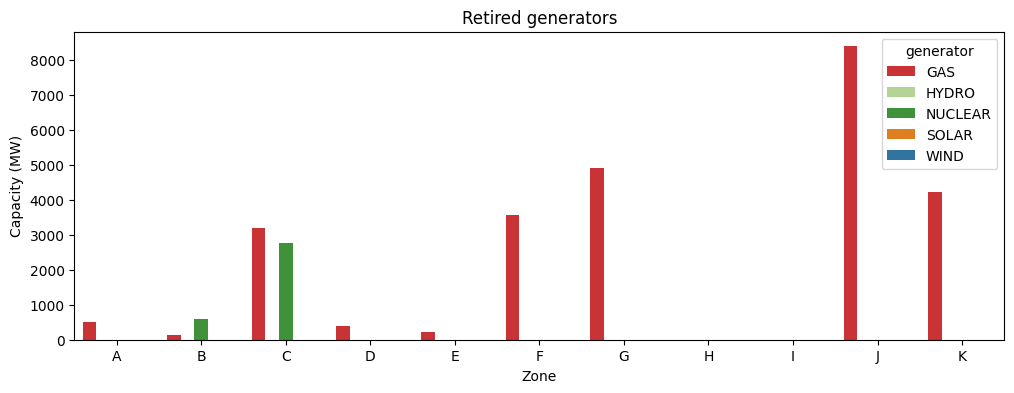

In [19]:
#Retired generators
df_plot = df_gen[df_gen.variable=='retired_capacity'].groupby(["zone","generator"])['value'].sum()
df_plot = df_plot.reset_index()

plt.figure(figsize=(12,4))
p1 = sns.barplot(data=df_plot, x='zone', y='value', hue='generator',palette=palette_dict)
plt.xlabel('Zone')
plt.ylabel('Capacity (MW)')
plt.title('Retired generators')
plt.show()

In [20]:
#Total production
df_gen[df_gen.variable=='Production'].groupby(['generator','zone'])['value'].sum().reset_index().pivot_table(index='generator',columns='zone',values='value')

zone,A,B,C,D,E,F,G,H,I,J,K
generator,,,,,,,,,,,
FOUR,10200481.65,46253.54,11702693.62,11763403.11,4144527.63,14458571.10,682813.37,645444.1,648437.1,17792801.79,8927555.32
GAS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,65926.97,167663.51
HYDRO,19490537.17,99423.01,927263.00,6115241.44,1032364.81,1498160.00,129390.60,0.0,0.0,0.00,0.00
NUCLEAR,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
SOLAR,52299.33,795893.66,3267.63,3536597.14,8390012.99,15931069.52,1044109.20,0.0,0.0,8450329.78,3393076.04
WIND,6137978.41,327301.86,133249.15,5107671.56,32758286.70,0.00,0.00,0.0,0.0,39081787.96,14908534.98


In [21]:
df_gen[df_gen.variable=='demand'].groupby(['generator','zone'])['value'].sum().reset_index().pivot_table(index='generator',columns='zone',values='value')

zone,A,B,C,D,E,F,G,H,I,J,K
generator,,,,,,,,,,,
demand,15885592.8,10085062.6,16551949.9,4667500.1,7990628.1,12367990.6,9959219.7,2805485.3,6067872.0,53332010.8,21314645.0


In [22]:
df_gen[df_gen.variable=='Charge'].groupby(['generator','zone'])['value'].sum().reset_index().pivot_table(index='generator',columns='zone',values='value')

zone,A,B,C,D,E,F,G,H,I,J,K
generator,,,,,,,,,,,
FOUR,11793827.51,53478.36,13530688.86,13600883.38,4791916.04,16717044.41,789470.25,746263.96,749724.55,20572091.64,10322064.99


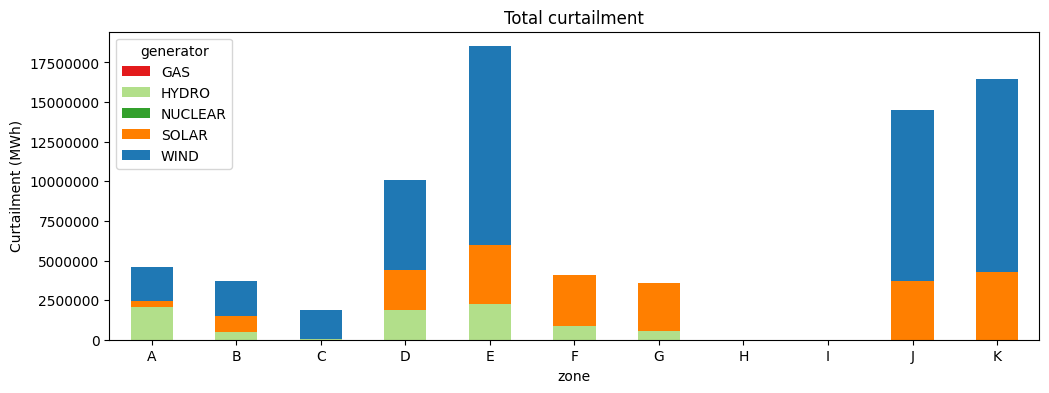

In [23]:
#Curtailment by zone by generator
df_plot = df_gen[(df_gen.variable=='Curtailment')].groupby(["zone","generator"])['value'].sum()
df_plot = df_plot.reset_index()

p=df_plot.pivot_table(index='zone',values='value',columns='generator').plot(kind='bar', stacked=True,figsize=(12, 4),rot=0,color=palette_dict)
plt.ticklabel_format(style='plain', useOffset=False, axis='y') ## No offset
plt.gca().set_ylabel("Curtailment (MWh)") ## Set Y-axis
plt.title("Total curtailment")
plt.show()

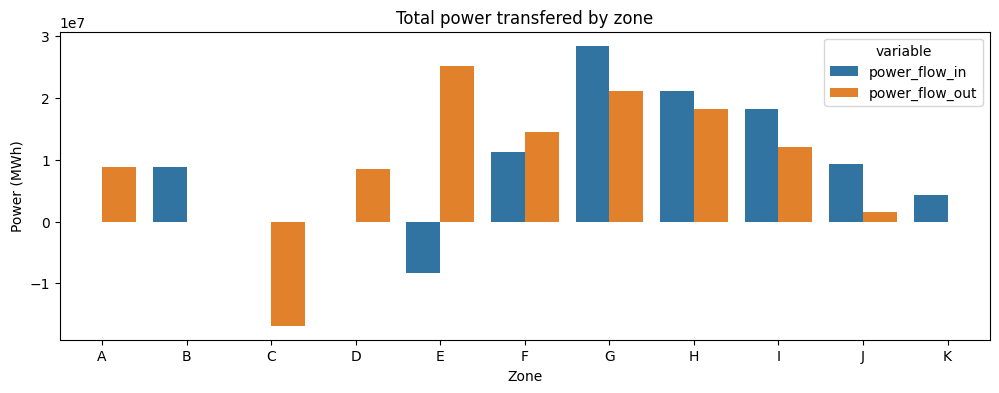

In [24]:
df_plot = df_gen[(df_gen.variable == "power_flow_in") | (df_gen.variable == "power_flow_out")].groupby(['zone','variable'])['value'].sum()
df_plot = df_plot.reset_index()

plt.figure(figsize=(12,4))
p1 = sns.barplot(data=df_plot, x='zone', y='value', hue='variable')
plt.xlabel('Zone')
plt.ylabel('Power (MWh)')
plt.title('Total power transfered by zone')
plt.show()

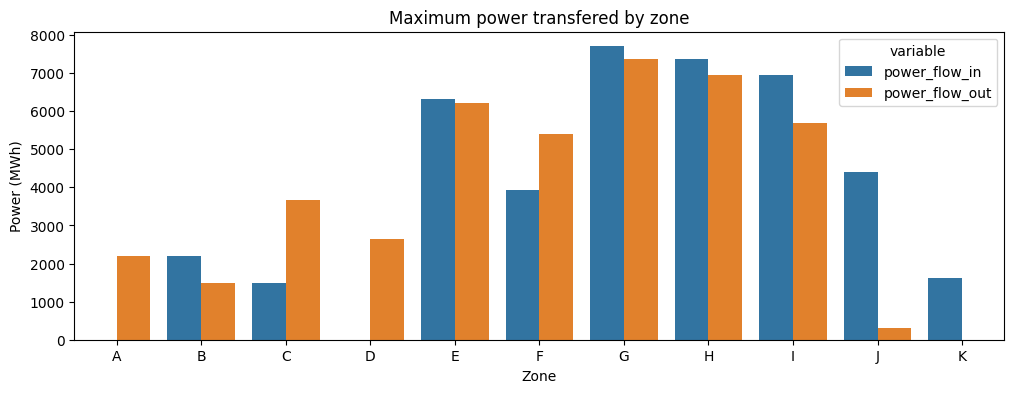

In [25]:
df_plot = df_gen[(df_gen.variable == "power_flow_in") | (df_gen.variable == "power_flow_out")].groupby(['zone','variable'])['value'].max()
df_plot = df_plot.reset_index()

plt.figure(figsize=(12,4))
p1 = sns.barplot(data=df_plot, x='zone', y='value', hue='variable')
plt.xlabel('Zone')
plt.ylabel('Power (MWh)')
plt.title('Maximum power transfered by zone')
plt.show()

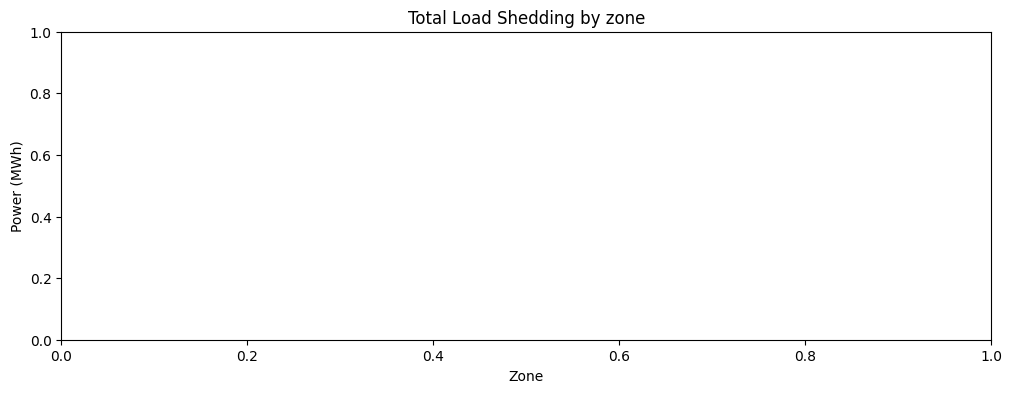

In [26]:
df_plot = df_gen[(df_gen.variable == "load_shed")].groupby(['zone','variable'])['value'].sum()
df_plot = df_plot.reset_index()

plt.figure(figsize=(12,4))
p1 = sns.barplot(data=df_plot, x='zone', y='value', hue='variable')
plt.xlabel('Zone')
plt.ylabel('Power (MWh)')
plt.title('Total Load Shedding by zone')
plt.show()

In [27]:
total_production_by_gen = df_gen[df_gen.variable == 'Production'].groupby(['generator','zone'])['value'].sum()
total_imported = df_gen[(df_gen.variable == "power_flow_in")].groupby(['zone','variable'])['value'].sum()
total_exported = df_gen[(df_gen.variable == "power_flow_out")].groupby(['zone','variable'])['value'].sum()

**Total production by source in the system**

In [28]:
# Sample Series
series1 = pd.Series([1, 2, 3], name='A')
series2 = pd.Series([4, 5, 6], name='B')

# 1. Using pd.concat()
merged_concat = pd.concat([series1, series2], axis=1)
print("Merged with concat:\n", merged_concat)

Merged with concat:
    A  B
0  1  4
1  2  5
2  3  6


In [29]:
b = pd.Series([0],index=['FOUR'])
b

FOUR    0
dtype: int64

In [30]:
a=df_gen[df_gen.variable == 'retired_capacity'].groupby(['generator'])['value'].sum()
b = pd.Series([0.0],index=['FOUR'],name='value')
retired = pd.concat([a,b],axis=0)

In [31]:
new = df_gen[df_gen.variable == 'new_capacity'].groupby(['generator'])['value'].sum()
existing = df_gen[df_gen.variable == 'existing_capacity'].groupby(['generator'])['value'].sum()

capacity = new + existing - retired

In [32]:
new

generator
FOUR       19825.00
GAS            0.00
HYDRO          0.00
NUCLEAR        0.00
SOLAR      49428.87
WIND       32884.68
Name: value, dtype: float64

In [33]:
capacity.reset_index()

,index,value
0,FOUR,19825.00
1,GAS,2159.75
2,HYDRO,4269.40
3,NUCLEAR,0.00
4,SOLAR,49683.27
5,WIND,35337.92


In [34]:
existing

generator
FOUR           0.00
GAS        27655.90
HYDRO       4269.40
NUCLEAR     3354.60
SOLAR        254.40
WIND        2453.24
Name: value, dtype: float64

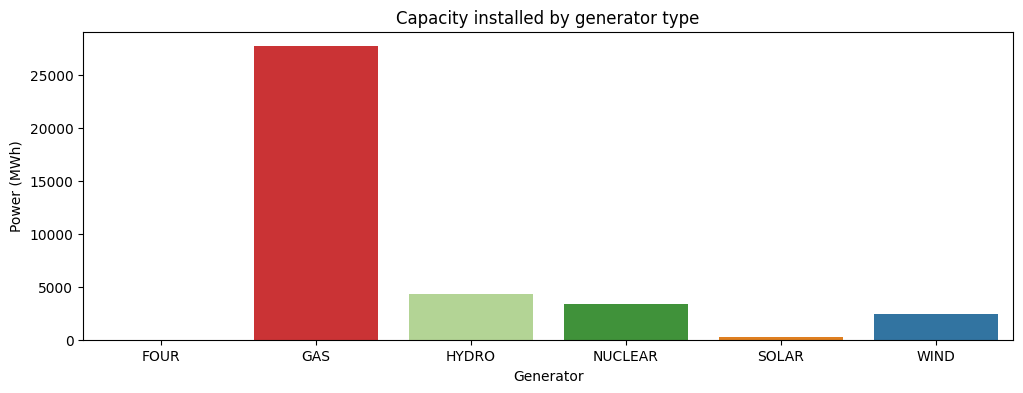

In [35]:
plt.figure(figsize=(12,4))
p1 = sns.barplot(data=existing.reset_index(), x='generator', y='value', hue='generator',palette=palette_dict)
plt.xlabel('Generator')
plt.ylabel('Power (MWh)')
plt.title('Capacity installed by generator type')
plt.show()


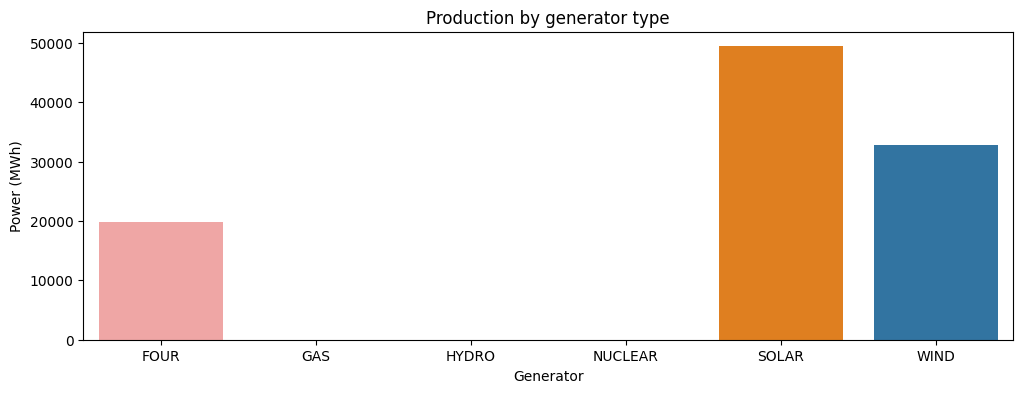

In [36]:
total_production_by_gen = df_gen[df_gen.variable == 'new_capacity'].groupby(['generator'])['value'].sum()
total_production_by_gen = total_production_by_gen.reset_index()
plt.figure(figsize=(12,4))
p1 = sns.barplot(data=total_production_by_gen, x='generator', y='value', hue='generator',palette=palette_dict)
plt.xlabel('Generator')
plt.ylabel('Power (MWh)')
plt.title('Production by generator type')
plt.show()


In [37]:
df_gen.variable.unique()

array(['existing_capacity', 'new_capacity', 'retired_capacity',
       'Production', 'Curtailment', 'Charge', 'demand', 'power_flow_in',
       'power_flow_out', 'Load_shed', 'imports'], dtype=object)

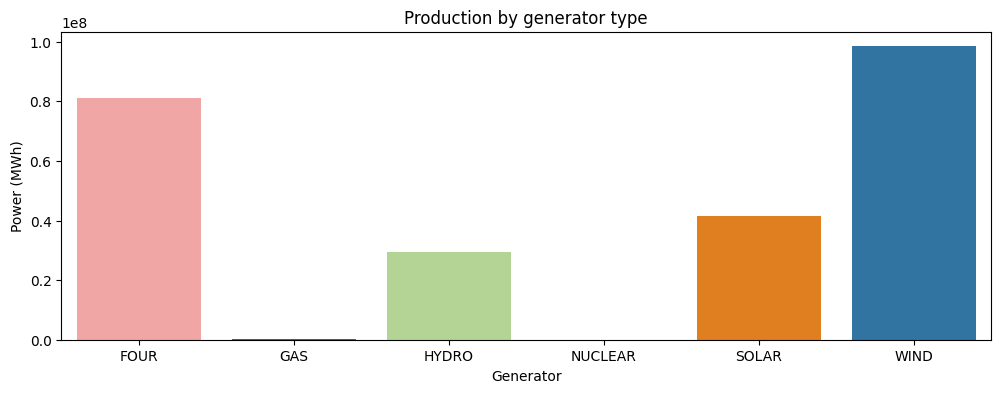

In [38]:
total_production_by_gen = df_gen[df_gen.variable == 'Production'].groupby(['generator'])['value'].sum()
total_production_by_gen = total_production_by_gen.reset_index()
plt.figure(figsize=(12,4))
p1 = sns.barplot(data=total_production_by_gen, x='generator', y='value', hue='generator',palette=palette_dict)
plt.xlabel('Generator')
plt.ylabel('Power (MWh)')
plt.title('Production by generator type')
plt.show()


In [39]:
total_production_by_gen = df_gen[df_gen.variable == 'Production'].groupby(['day','generator'])['value'].sum()
total_production_by_gen = total_production_by_gen.reset_index()

In [40]:
total_day = df_gen[df_gen.variable == 'Production'].groupby(['day'])['value'].sum()
total_day = total_day.reset_index()
total_day = total_day.rename(columns={"value": "total"})
total_production_by_gen = total_production_by_gen.merge(total_day,on='day')
total_production_by_gen['share'] = total_production_by_gen['value']/total_production_by_gen['total']

In [41]:
#max_indices = df_gen[df_gen.variable == 'Production'].groupby(['day'])['value'].idxmax()

#max_prod = df_gen[df_gen.variable == 'Production'].loc[max_indices, ['generator','day','value']]
#max_prod = max_prod.reset_index()

#p=max_prod.pivot_table(index='day',values='value',columns='generator').plot(kind='bar',figsize=(12, 4),rot=0)
#plt.ticklabel_format(style='plain', useOffset=False, axis='y') ## No offset
#plt.gca().set_ylabel("Power (MWh)") ## Set Y-axis
#plt.title("Generator with max production")
#plt.show()

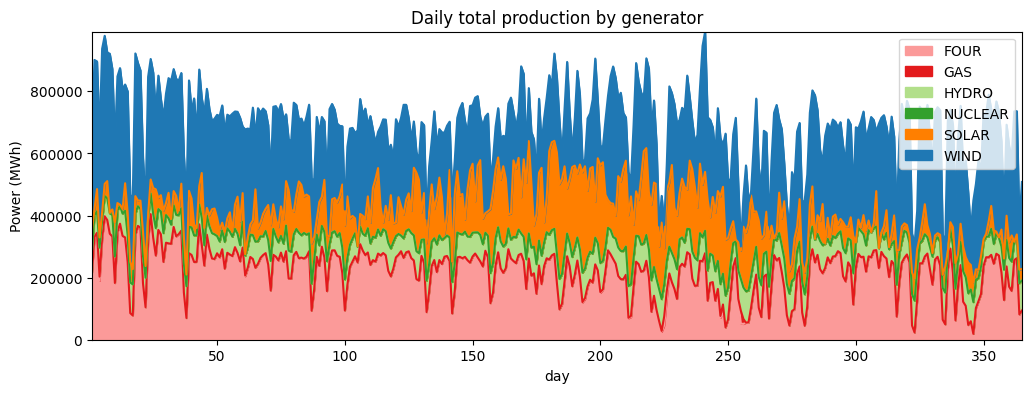

In [42]:
#df_winter = df_gen.set_index(df_gen.time_in_time)['2018-01-01':'2018-03-01']
p=total_production_by_gen.pivot_table(index='day',values='value',columns='generator').plot(kind='area', stacked=True,figsize=(12, 4),rot=0,color=palette_dict)
p.autoscale(tight=True)
plt.ticklabel_format(style='plain', useOffset=False, axis='y') ## No offset
plt.gca().set_ylabel("Power (MWh)") ## Set Y-axis
plt.title("Daily total production by generator")
plt.legend(loc='upper right')

plt.show()

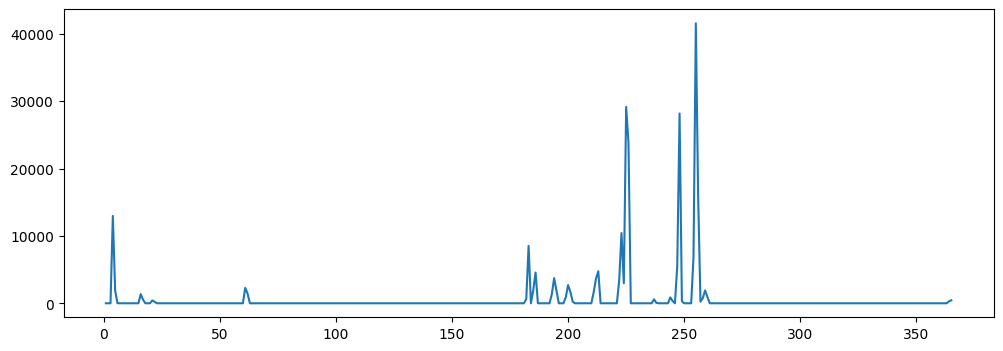

In [43]:
plt.figure(figsize=(12, 4))
plt.plot(total_production_by_gen.pivot_table(index='day',values='value',columns='generator')['GAS'])
plt.show()

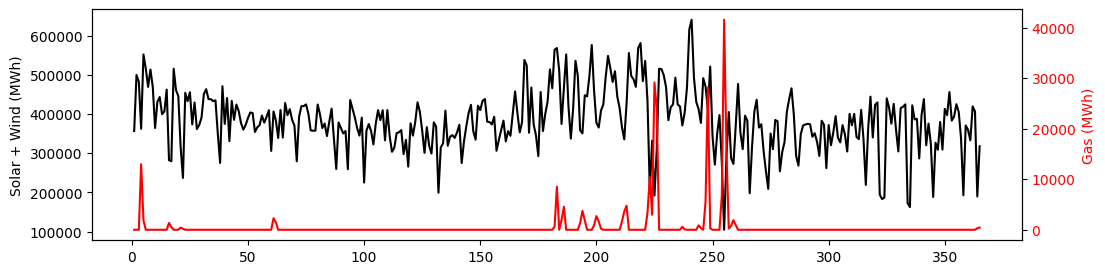

In [44]:
fig, ax1 = plt.subplots(figsize=(12,3))
#ax1.plot(df_gen[(df_gen.variable=='demand') & (df_gen.zone=="J")].groupby('day')['value'].sum().reset_index()['value'])
ax1.plot(
    total_production_by_gen.pivot_table(index='day',values='value',columns='generator')['SOLAR']+
    total_production_by_gen.pivot_table(index='day',values='value',columns='generator')['WIND'],color="black")
ax1.tick_params(axis="y",labelcolor="black")
ax1.set_ylabel("Solar + Wind (MWh)")
ax2 = ax1.twinx()
ax2.plot(total_production_by_gen.pivot_table(index='day',values='value',columns='generator')['GAS'],color="red")
ax2.tick_params(axis="y",labelcolor="red")
ax2.set_ylabel("Gas (MWh)",color="red")
plt.show()

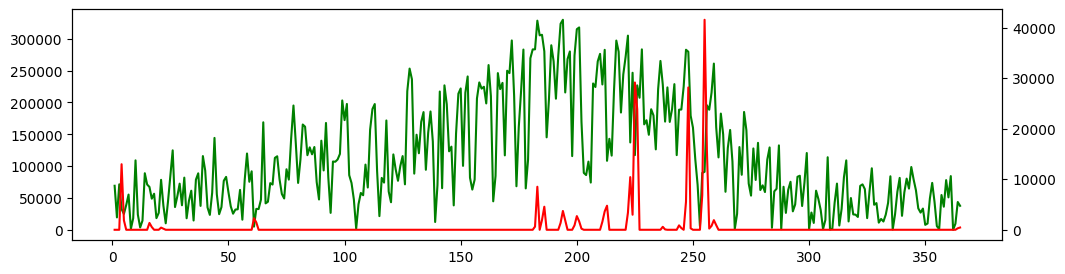

In [45]:
fig, ax1 = plt.subplots(figsize=(12,3))
#ax1.plot(df_gen[(df_gen.variable=='demand') & (df_gen.zone=="J")].groupby('day')['value'].sum().reset_index()['value'])
ax1.plot(total_production_by_gen.pivot_table(index='day',values='value',columns='generator')['SOLAR'],color="green")

ax2 = ax1.twinx()
ax2.plot(total_production_by_gen.pivot_table(index='day',values='value',columns='generator')['GAS'],color="red")

plt.show()

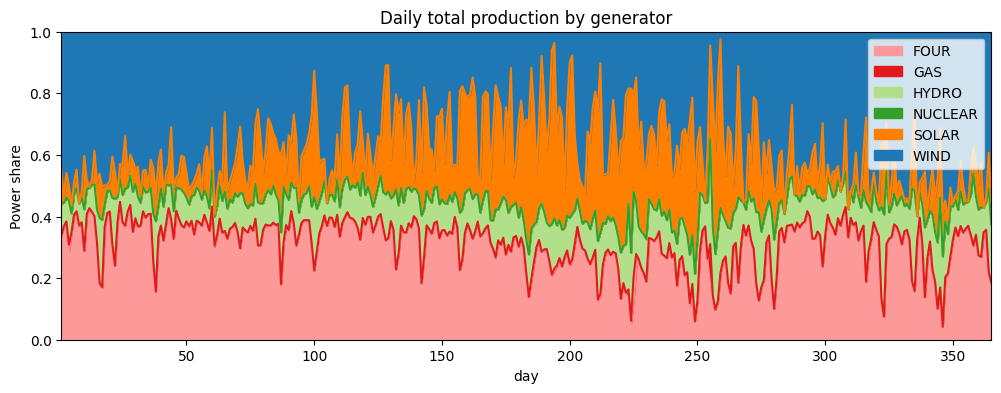

In [46]:
#df_winter = df_gen.set_index(df_gen.time_in_time)['2018-01-01':'2018-03-01']
p=total_production_by_gen.pivot_table(index='day',values='share',columns='generator').plot(kind='area', stacked=True,figsize=(12, 4),rot=0,color=palette_dict)
p.autoscale(tight=True)

plt.ticklabel_format(style='plain', useOffset=False, axis='y') ## No offset
plt.gca().set_ylabel("Power share") ## Set Y-axis
plt.title("Daily total production by generator")
plt.legend(loc='upper right')
plt.show()

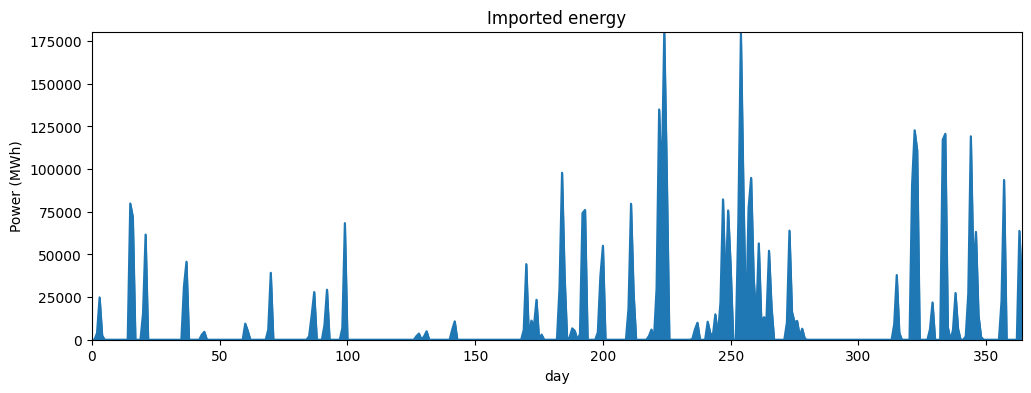

In [47]:
#imports
total_day = df_gen[df_gen.variable == 'imports'].groupby(['day'])['value'].sum()
total_day = total_day.reset_index()

p=total_day['value'].plot(kind='area', figsize=(12, 4),rot=0)
p.autoscale(tight=True)
plt.ticklabel_format(style='plain', useOffset=False, axis='y') ## No offset
plt.gca().set_ylabel("Power (MWh)") ## Set Y-axis
plt.gca().set_xlabel("day") ## Set Y-axis
plt.title("Imported energy")
#plt.legend()

plt.show()

In [48]:
df_flow = df_gen[df_gen.variable=="Flow"]
df_flow.value = np.abs(df_flow.value)
#df_flow.groupby("zone")['value'].max()

In [49]:
df_flow.groupby('zone')['value'].mean().reset_index()

,zone,value


In [50]:
(df_flow.where(df_flow.value==1).dropna().groupby('zone')['value'].count()/8755).reset_index()

,zone,value


In [51]:
df_flow.mask(df_flow.value==1).dropna().groupby('zone')['value'].count()

Series([], Name: value, dtype: int64)

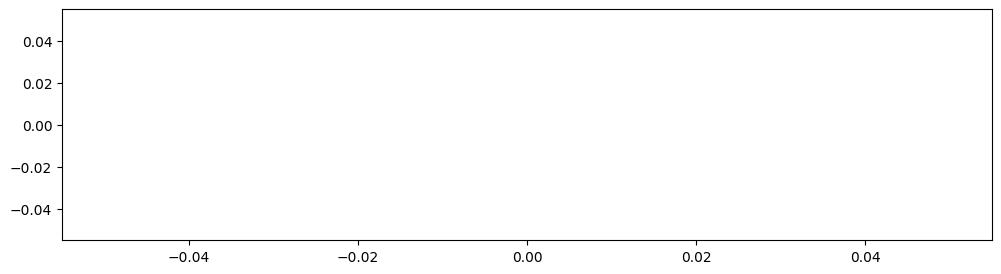

In [52]:
df_plot = df_gen#['2018-01-01':'2018-01-10']
df_plot = df_plot.set_index('time_in_time')
df_plot = df_plot['2018-01-01':'2018-01-10']
plt.figure(figsize=(12,3))
plt.plot(np.abs(df_plot.value[df_plot.zone=='IK']))
plt.show()